In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msn
import scipy.stats as stat
from matplotlib import pylab

In [143]:
df = pd.read_csv('NewData.csv')

In [144]:
df.head(3)

,com,sim_content,sin_comment,word_count,duplicate_word_ratio,no_of_sentences,length_of_comment,num_of_punctuations,is_period_sequence,stop_word_ratio,post_coment_gap,black_word_count,is_link,is_youtube_link,is_number,is_mail,comment_duplication,classifier_val
0,Ugx18OdhnjkAtm4_kvF4AaABAg,0.204106,0.272918,4,0.000000,1,19,0,0,0.0,86305.716667,1,0,0,0,0,0.0,0
1,Ugy3Fx_GQfOtmO9C2kF4AaABAg,0.261610,0.250529,15,0.000000,1,86,0,0,0.0,65233.033333,0,0,0,0,0,0.0,0
2,UgxCTzZDv-L9XYzGWEB4AaABAg,0.367243,0.363870,31,0.032258,1,167,0,0,0.0,63645.483333,4,0,0,0,0,0.0,0


In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10635 entries, 0 to 10634
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   com                   10635 non-null  object 
 1   sim_content           10635 non-null  float64
 2   sin_comment           10635 non-null  float64
 3   word_count            10635 non-null  int64  
 4   duplicate_word_ratio  10635 non-null  float64
 5   no_of_sentences       10635 non-null  int64  
 6   length_of_comment     10635 non-null  int64  
 7   num_of_punctuations   10635 non-null  int64  
 8   is_period_sequence    10635 non-null  int64  
 9   stop_word_ratio       10635 non-null  float64
 10  post_coment_gap       10635 non-null  float64
 11  black_word_count      10635 non-null  int64  
 12  is_link               10635 non-null  int64  
 13  is_youtube_link       10635 non-null  int64  
 14  is_number             10635 non-null  int64  
 15  is_mail            

In [5]:
# all of features are in float and int data types and no missing values

<AxesSubplot:>

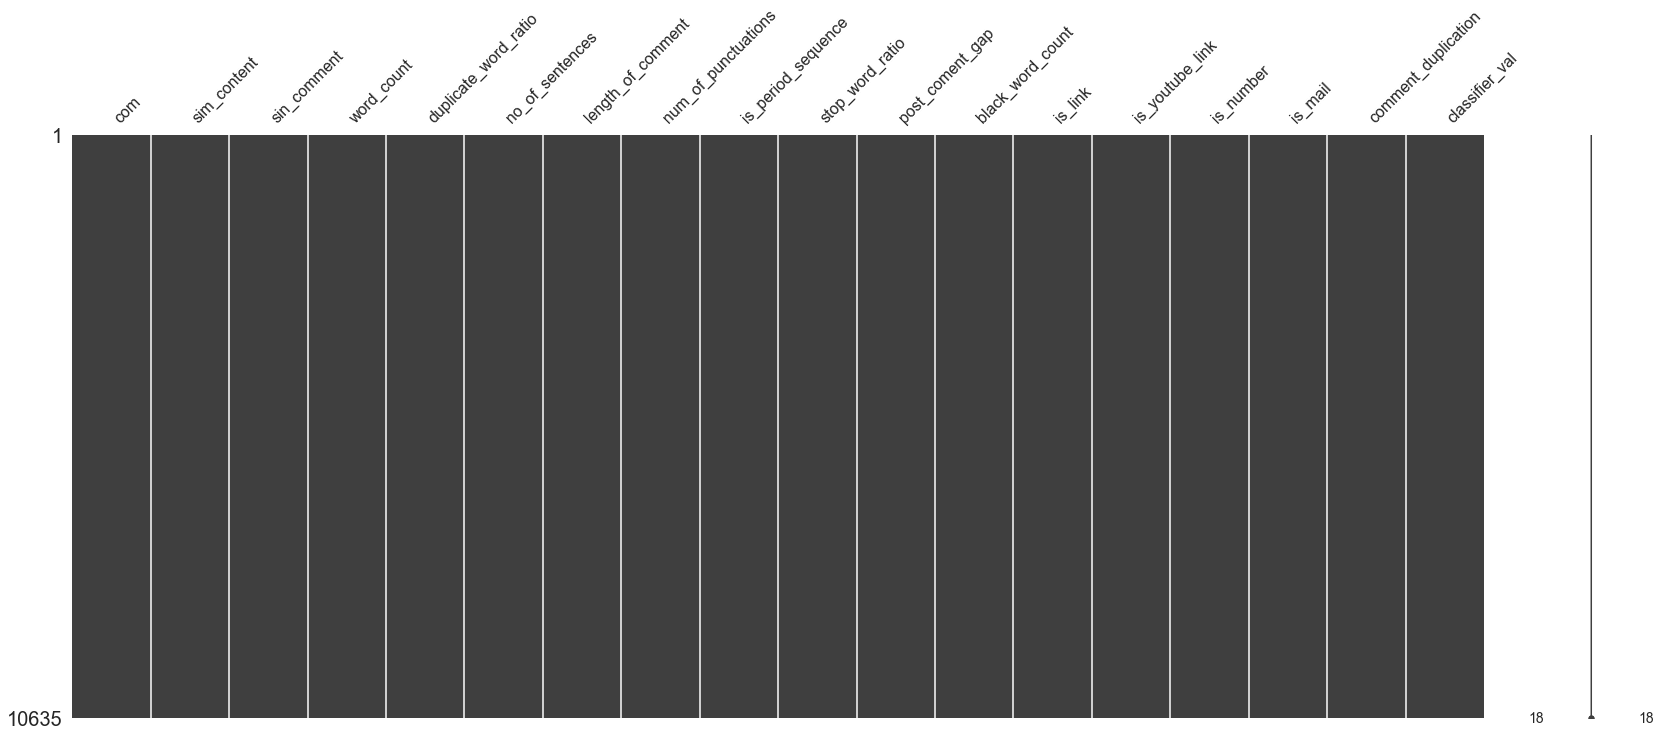

In [146]:
msn.matrix(df)

In [147]:
df.columns

Index(['com', 'sim_content', 'sin_comment', 'word_count',
       'duplicate_word_ratio', 'no_of_sentences', 'length_of_comment',
       'num_of_punctuations', 'is_period_sequence', 'stop_word_ratio',
       'post_coment_gap', 'black_word_count', 'is_link', 'is_youtube_link',
       'is_number', 'is_mail', 'comment_duplication', 'classifier_val'],
      dtype='object')

In [148]:
df['is_mail'].value_counts()

0    10635
Name: is_mail, dtype: int64

In [111]:
#no values in is mail columns. i gonna drop it

In [149]:
df.drop('is_mail',axis=1,inplace=True)

In [150]:
df1 = df[['sim_content', 'sin_comment', 'word_count',
       'duplicate_word_ratio', 'no_of_sentences', 'length_of_comment',
       'num_of_punctuations', 'is_period_sequence', 'stop_word_ratio',
       'post_coment_gap', 'black_word_count', 'is_link', 'is_youtube_link',
       'is_number',  'comment_duplication', 'classifier_val']]

In [151]:
continous_features = [x for x in df1.columns if df1[x].dtype == 'float64']

In [135]:
continous_features

['sim_content',
 'sin_comment',
 'duplicate_word_ratio',
 'stop_word_ratio',
 'post_coment_gap',
 'comment_duplication']

In [152]:
discreate_features = [x for x in df.columns if x not in continous_features if x not in ['classifier_val','com'] ]

In [153]:
discreate_features

['word_count',
 'no_of_sentences',
 'length_of_comment',
 'num_of_punctuations',
 'is_period_sequence',
 'black_word_count',
 'is_link',
 'is_youtube_link',
 'is_number']

### Handle Outliers

In [154]:
df2 = df.copy()

In [14]:
# 'sim_content'

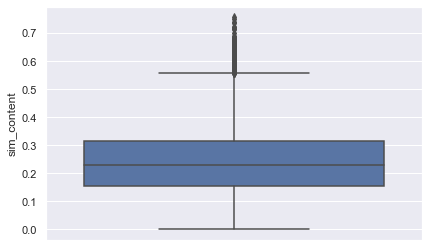

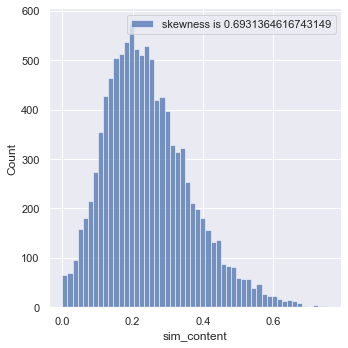

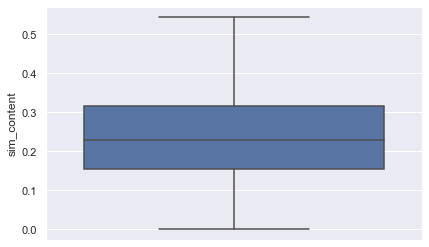

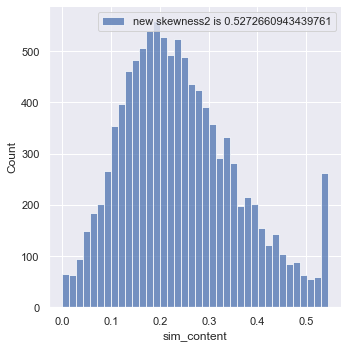

In [155]:
sns.set_theme(style='darkgrid')
sns.boxplot(y=df2['sim_content'])
plt.show()
sns.displot( data=df2['sim_content'],label="skewness is {}".format(df2['sim_content'].skew()))
plt.legend(loc='best')
plt.show()


#x = df2['sim_content'].quantile(0.1)
y = df2['sim_content'].quantile(0.98)
#df2['sim_content']= np.where(df2['sim_content'] < x,  x,df2['sim_content'])
df2['sim_content']= np.where(df2['sim_content'] > y,  y,df2['sim_content'])


sns.boxplot(y=df2['sim_content'])
plt.show()
sns.displot(data=df2['sim_content'],label="new skewness2 is {}".format(df2['sim_content'].skew()))
plt.legend(loc='best')
plt.show()

In [157]:
# 'sin_comment'
df3 = df2.copy()


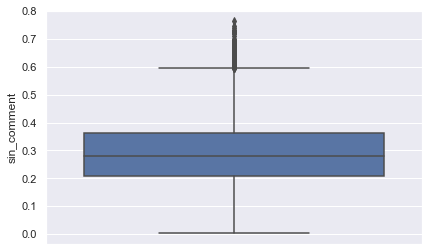

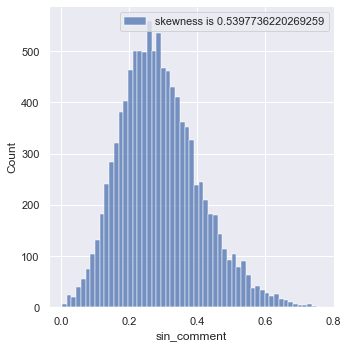

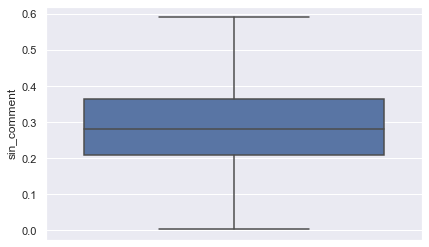

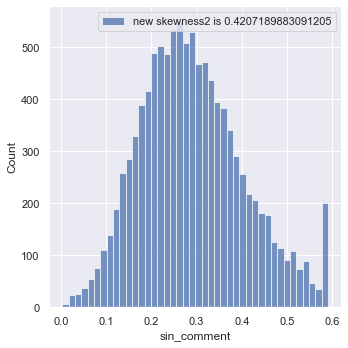

In [158]:
sns.set_theme(style='darkgrid')
sns.boxplot(y=df3['sin_comment'])
plt.show()
sns.displot( data=df3['sin_comment'],label="skewness is {}".format(df3['sin_comment'].skew()))
plt.legend(loc='best')
plt.show()


#x = df3['sin_comment'].quantile(0.03)
y = df3['sin_comment'].quantile(0.985)
#df3['sin_comment']= np.where(df3['sin_comment'] < x,  x,df3['sin_comment'])
df3['sin_comment']= np.where(df3['sin_comment'] > y,  y,df3['sin_comment'])


sns.boxplot(y=df3['sin_comment'])
plt.show()
sns.displot(data=df3['sin_comment'],label="new skewness2 is {}".format(df3['sin_comment'].skew()))
plt.legend(loc='best')
plt.show()

In [159]:
# 'word_count'
df4 = df3.copy()

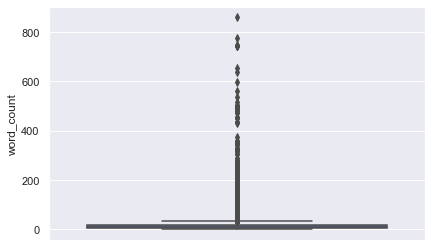

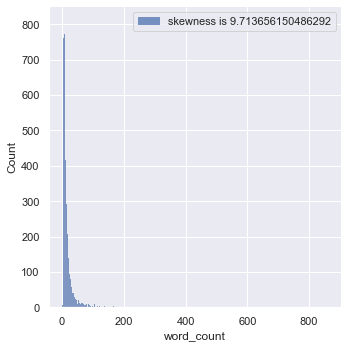

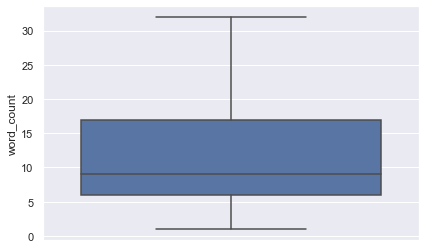

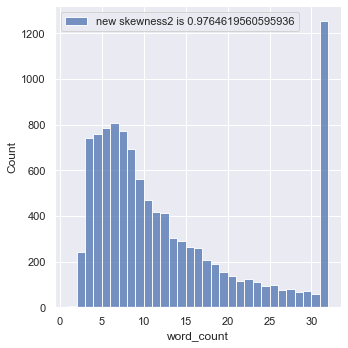

In [160]:
sns.set_theme(style='darkgrid')
sns.boxplot(y=df4['word_count'])
plt.show()
sns.displot( data=df4['word_count'],label="skewness is {}".format(df4['word_count'].skew()))
plt.legend(loc='best')
plt.show()


#x = df2['word_count'].quantile(0.1)
y = df4['word_count'].quantile(0.89)
#df2['word_count']= np.where(df2['word_count'] < x,  x,df2['word_count'])
df4['word_count']= np.where(df4['word_count'] > y,  y,df4['word_count'])


sns.boxplot(y=df4['word_count'])
plt.show()
sns.displot(data=df4['word_count'],label="new skewness2 is {}".format(df4['word_count'].skew()))
plt.legend(loc='best')
plt.show()

In [161]:
# 'duplicate_word_ratio'
df5 = df4.copy()

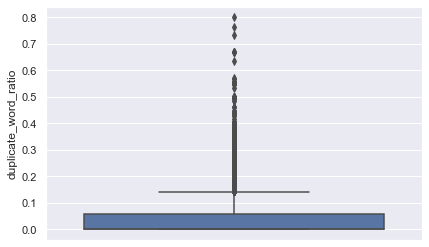

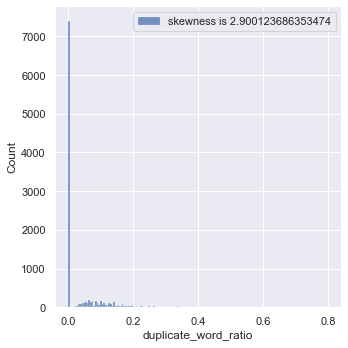

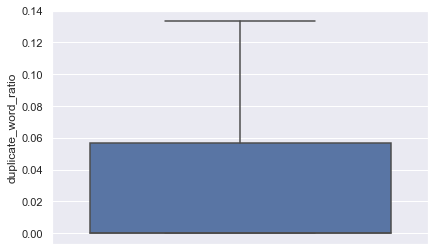

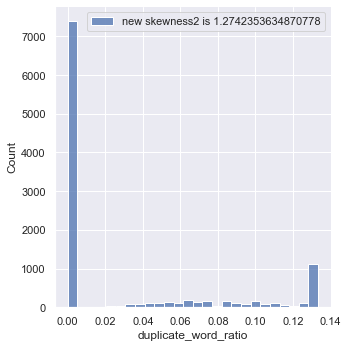

In [162]:
sns.set_theme(style='darkgrid')
sns.boxplot(y=df5['duplicate_word_ratio'])
plt.show()
sns.displot( data=df5['duplicate_word_ratio'],label="skewness is {}".format(df5['duplicate_word_ratio'].skew()))
plt.legend(loc='best')
plt.show()


#x = df2['duplicate_word_ratio'].quantile(0.1)
y = df5['duplicate_word_ratio'].quantile(0.9)
#df2['duplicate_word_ratiot']= np.where(df2['duplicate_word_ratio'] < x,  x,df2['duplicate_word_ratio'])
df5['duplicate_word_ratio']= np.where(df5['duplicate_word_ratio'] > y,  y,df5['duplicate_word_ratio'])


sns.boxplot(y=df5['duplicate_word_ratio'])
plt.show()
sns.displot(data=df5['duplicate_word_ratio'],label="new skewness2 is {}".format(df5['duplicate_word_ratio'].skew()))
plt.legend(loc='best')
plt.show()

In [163]:
# 'no_of_sentences'
df6 = df5.copy()

In [164]:
df6['no_of_sentences'].value_counts()

1     7530
2     1208
3      628
4      370
5      254
6      147
7       93
8       85
9       43
10      42
11      38
12      31
13      25
15      13
18      12
14      12
20      11
16      10
19       9
17       7
23       6
31       5
70       4
22       4
24       4
28       4
21       3
30       3
39       3
36       3
74       3
38       2
25       2
29       2
73       2
27       2
44       1
33       1
41       1
49       1
66       1
46       1
96       1
90       1
68       1
40       1
93       1
61       1
59       1
72       1
47       1
Name: no_of_sentences, dtype: int64

In [165]:
df6['no_of_sentences'] = np.where(df6['no_of_sentences']>4,4,df6['no_of_sentences'])

In [166]:
df6['no_of_sentences'].value_counts()

1    7530
4    1269
2    1208
3     628
Name: no_of_sentences, dtype: int64

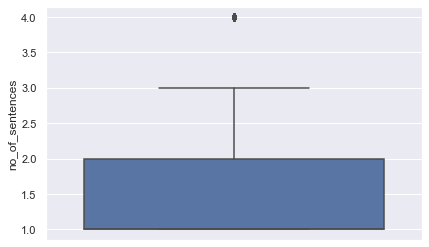

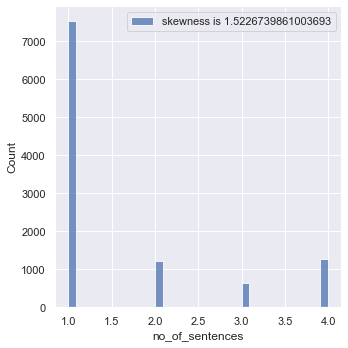

In [167]:
sns.set_theme(style='darkgrid')
sns.boxplot(y=df6['no_of_sentences'])
plt.show()
sns.displot( data=df6['no_of_sentences'],label="skewness is {}".format(df6['no_of_sentences'].skew()))
plt.legend(loc='best')
plt.show()


#x = df6['no_of_sentences'].quantile(0.1)
#y = df6['no_of_sentences'].quantile(0.7)
#df6['no_of_sentences']= np.where(df6['no_of_sentences'] < x,  x,df6['no_of_sentences'])
#df6['no_of_sentences']= np.where(df6['no_of_sentences'] > y,  y,df6['no_of_sentences'])


#sns.boxplot(y=df6['no_of_sentences'])
#plt.show()
#sns.displot(data=df6['no_of_sentences'],label="new skewness2 is {}".format(df6['no_of_sentences'].skew()))
#plt.legend(loc='best')
#plt.show()

In [168]:
# 'length_of_comment'
df7 = df6.copy()

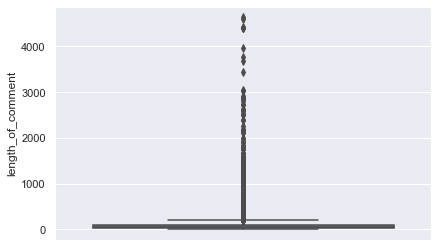

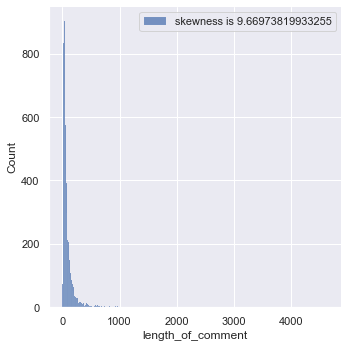

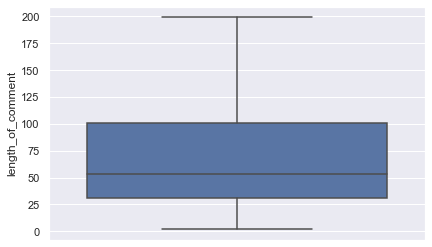

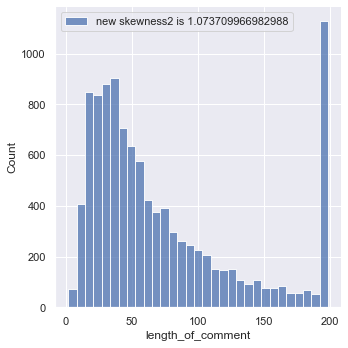

In [169]:
sns.set_theme(style='darkgrid')
sns.boxplot(y=df7['length_of_comment'])
plt.show()
sns.displot( data=df7['length_of_comment'],label="skewness is {}".format(df7['length_of_comment'].skew()))
plt.legend(loc='best')
plt.show()


#x = df7['length_of_comment'].quantile(0.1)
y = df7['length_of_comment'].quantile(0.9)
#df7['length_of_comment']= np.where(df7['length_of_comment'] < x,  x,df7['length_of_comment'])
df7['length_of_comment']= np.where(df7['length_of_comment'] > y,  y,df7['length_of_comment'])


sns.boxplot(y=df7['length_of_comment'])
plt.show()
sns.displot(data=df7['length_of_comment'],label="new skewness2 is {}".format(df7['length_of_comment'].skew()))
plt.legend(loc='best')
plt.show()

In [172]:
# 'num_of_punctuations'
df8 = df7.copy()

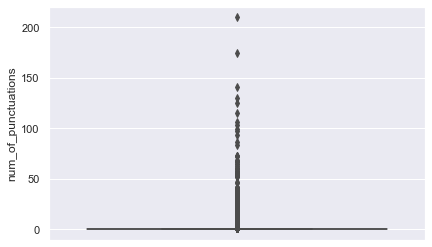

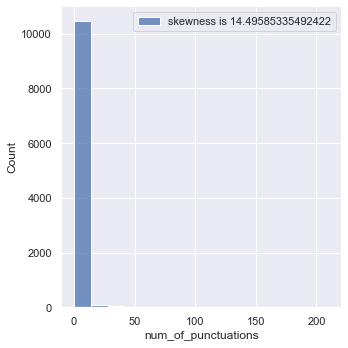

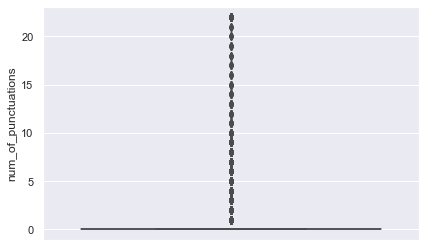

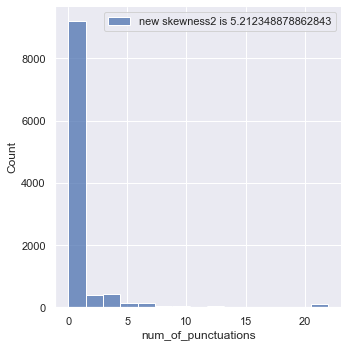

In [173]:
sns.set_theme(style='darkgrid')
sns.boxplot(y=df8['num_of_punctuations'])
plt.show()
sns.displot( data=df8['num_of_punctuations'],label="skewness is {}".format(df8['num_of_punctuations'].skew()))
plt.legend(loc='best')
plt.show()


#x = df8['num_of_punctuations'].quantile(0.1)
y = df8['num_of_punctuations'].quantile(0.99)
#df8['num_of_punctuations']= np.where(df8['num_of_punctuationst'] < x,  x,df8['num_of_punctuations'])
df8['num_of_punctuations']= np.where(df8['num_of_punctuations'] > y,  y,df8['num_of_punctuations'])


sns.boxplot(y=df8['num_of_punctuations'])
plt.show()
sns.displot(data=df8['num_of_punctuations'],label="new skewness2 is {}".format(df8['num_of_punctuations'].skew()))
plt.legend(loc='best')
plt.show()

In [174]:
# 'stop_word_ratio'
df9 = df8.copy()

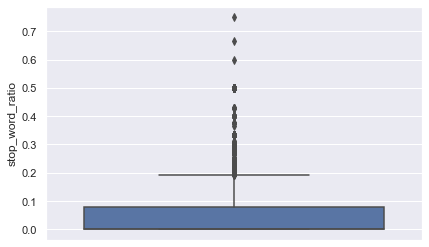

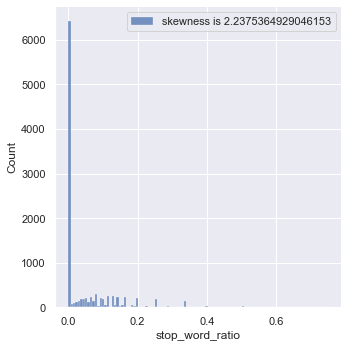

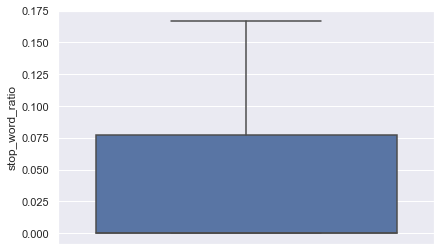

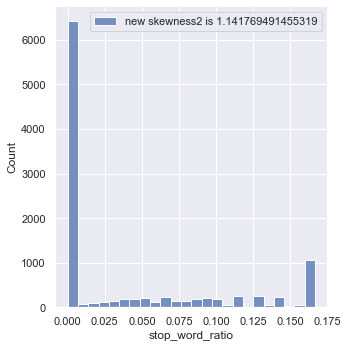

In [175]:
sns.set_theme(style='darkgrid')
sns.boxplot(y=df9['stop_word_ratio'])
plt.show()
sns.displot( data=df9['stop_word_ratio'],label="skewness is {}".format(df9['stop_word_ratio'].skew()))
plt.legend(loc='best')
plt.show()


#x = df9['stop_word_ratio'].quantile(0.1)
y = df9['stop_word_ratio'].quantile(0.92)
#df9['stop_word_ratio']= np.where(df9['stop_word_ratio'] < x,  x,df9['stop_word_ratio'])
df9['stop_word_ratio']= np.where(df9['stop_word_ratio'] > y,  y,df9['stop_word_ratio'])


sns.boxplot(y=df9['stop_word_ratio'])
plt.show()
sns.displot(data=df9['stop_word_ratio'],label="new skewness2 is {}".format(df9['stop_word_ratio'].skew()))
plt.legend(loc='best')
plt.show()

In [176]:
# 'post_coment_gap'
df10 = df9.copy()

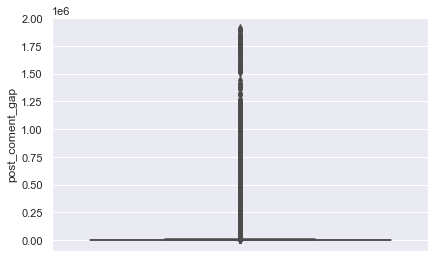

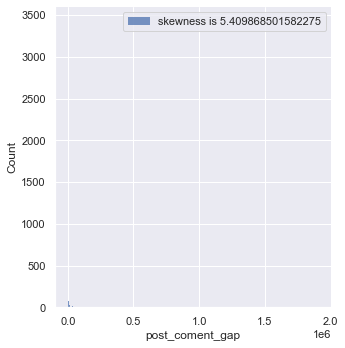

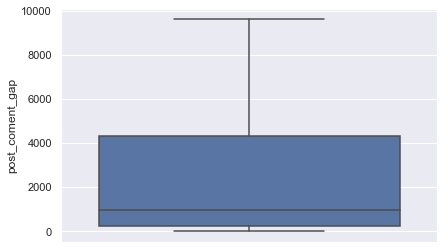

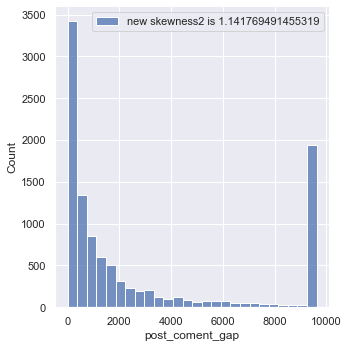

In [177]:
sns.set_theme(style='darkgrid')
sns.boxplot(y=df10['post_coment_gap'])
plt.show()
sns.displot( data=df10['post_coment_gap'],label="skewness is {}".format(df10['post_coment_gap'].skew()))
plt.legend(loc='best')
plt.show()


#x = df10['post_coment_gap'].quantile(0.1)
y = df10['post_coment_gap'].quantile(0.82)
#df10['post_coment_gap']= np.where(df10['post_coment_gap'] < x,  x,df10['post_coment_gap'])
df10['post_coment_gap']= np.where(df10['post_coment_gap'] > y,  y,df10['post_coment_gap'])


sns.boxplot(y=df10['post_coment_gap'])
plt.show()
sns.displot(data=df10['post_coment_gap'],label="new skewness2 is {}".format(df10['stop_word_ratio'].skew()))
plt.legend(loc='best')
plt.show()

In [178]:
# 'black_word_count'
df11 = df10.copy()

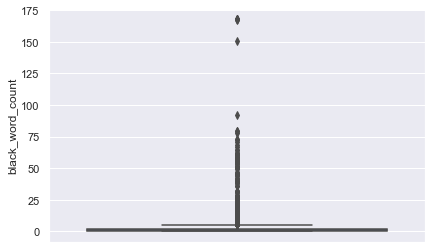

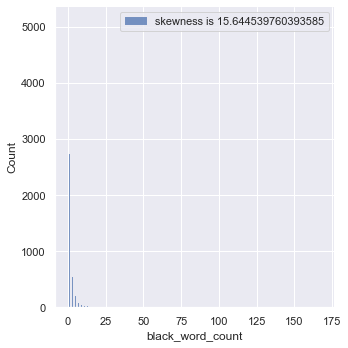

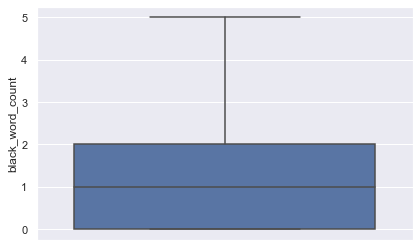

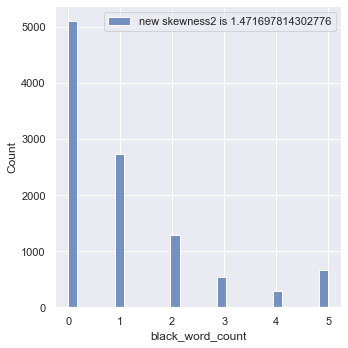

In [179]:
sns.set_theme(style='darkgrid')
sns.boxplot(y=df11['black_word_count'])
plt.show()
sns.displot( data=df11['black_word_count'],label="skewness is {}".format(df11['black_word_count'].skew()))
plt.legend(loc='best')
plt.show()


#x = df10['post_coment_gap'].quantile(0.1)
y = df11['black_word_count'].quantile(0.95)
#df10['post_coment_gap']= np.where(df10['post_coment_gap'] < x,  x,df10['post_coment_gap'])
df11['black_word_count']= np.where(df11['black_word_count'] > y,  y,df11['black_word_count'])


sns.boxplot(y=df11['black_word_count'])
plt.show()
sns.displot(data=df11['black_word_count'],label="new skewness2 is {}".format(df11['black_word_count'].skew()))
plt.legend(loc='best')
plt.show()

In [37]:
# outliers handle in features 

In [38]:
#df1['num_of_punctuations'].value_counts().plot(kind='bar')

### find the realtionship between categoricl features and target variable

#### 'word_count' vs 'classifier_val'

In [180]:
pd.pivot_table(df11, index = ['classifier_val'], values = ['word_count'] ,aggfunc='mean') 

,word_count
classifier_val,
0,12.262435
1,19.129353


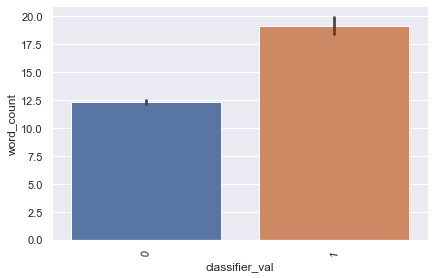

In [181]:
sns.barplot(data = df11,x='classifier_val', y ='word_count' )
plt.xticks(rotation=80)
plt.show()

In [41]:
#class_1 = df11.groupby('classifier_val').get_group(1)
#class_0 = df11.groupby('classifier_val').get_group(0)


<AxesSubplot:xlabel='word_count', ylabel='classifier_val'>

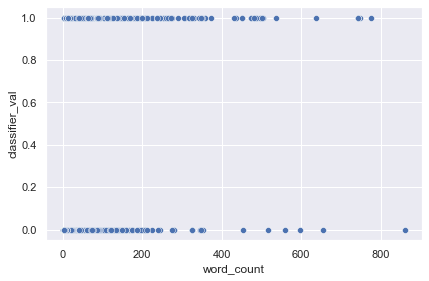

In [182]:
sns.scatterplot(data=df, x='word_count',y='classifier_val')

In [43]:
# we can see when increase the number of words, the probability of being a spam also going to high

#### 'no_of_sentences' vs 'classifier_val'

In [183]:
pd.pivot_table(data=df11, index=['classifier_val'], values=['no_of_sentences'], aggfunc='mean')

,no_of_sentences
classifier_val,
0,1.526193
1,2.365672


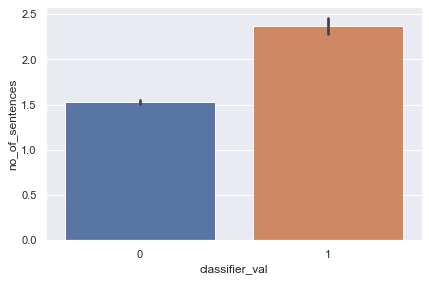

In [184]:
sns.barplot(data=df11, x='classifier_val',y='no_of_sentences')
plt.show()

<AxesSubplot:xlabel='no_of_sentences', ylabel='classifier_val'>

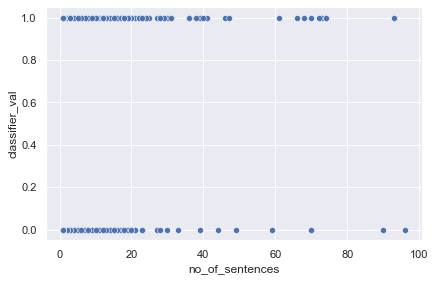

In [185]:
sns.scatterplot(data=df, x='no_of_sentences',y='classifier_val')

In [47]:
# we can see when increase the number of sentences ,probabiliy of being a spam also going to high

#### 'length_of_comment' vs 'classifier_val'

In [186]:
pd.pivot_table(data=df11, index=['classifier_val'], values=['length_of_comment'], aggfunc='mean')

,length_of_comment
classifier_val,
0,70.860747
1,117.366915


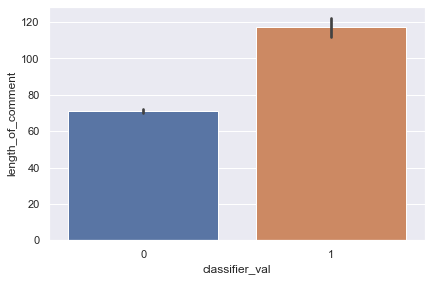

In [187]:
sns.barplot(data=df11, x='classifier_val', y='length_of_comment')
plt.show()

<AxesSubplot:xlabel='length_of_comment', ylabel='classifier_val'>

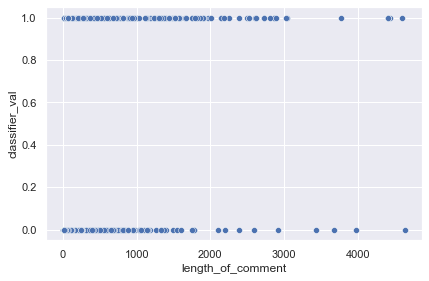

In [188]:
sns.scatterplot(data=df,x='length_of_comment',y='classifier_val')

In [51]:
# we can see when increase the length of a comment ,the probability of being a spam also going to high

#### 'num_of_punctuations' vs 'classifier_val'

In [189]:
pd.pivot_table(data=df11, index=['classifier_val'],values=['num_of_punctuations'],aggfunc='mean')

,num_of_punctuations
classifier_val,
0,0.518360
1,5.813433


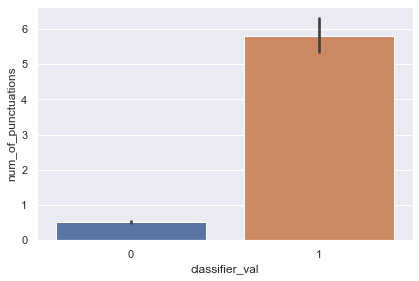

In [190]:
sns.barplot(data=df11, x='classifier_val',y='num_of_punctuations')
plt.show()

<AxesSubplot:xlabel='num_of_punctuations', ylabel='classifier_val'>

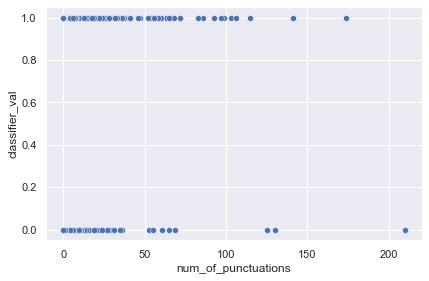

In [191]:
sns.scatterplot(data=df,x='num_of_punctuations',y='classifier_val')

In [55]:
# we can see when increase the number of punctuations ,the probability of being a spam also going to high

#### 'is_period_sequence' vs 'classifier_val'

In [192]:
pd.pivot_table(data=df11, index=['is_period_sequence','classifier_val'],values=['com'],aggfunc='count')

com
is_period_sequence classifier_val      
0                  0               7200
                   1                585
1                  0               2631
                   1                219

In [193]:
group_from_dots = df11.groupby(['is_period_sequence'])

#get a data frame with period_sequence value == 1
dfs_dots = group_from_dots.get_group(1)

dfs_dots['classifier_val'].value_counts()

0    2631
1     219
Name: classifier_val, dtype: int64

In [194]:
from matplotlib import pyplot as plt
plt.style.use("fivethirtyeight")
filt = (dfs_dots['classifier_val'] == 1)
spam = dfs_dots[filt]['is_period_sequence'].count()
filt = (dfs_dots['classifier_val'] == 0)
ham = dfs_dots[filt]['is_period_sequence'].count()

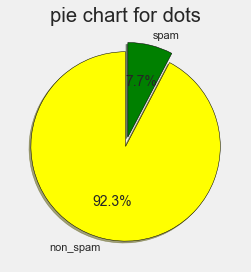

In [195]:
slices = [ham,spam]
labels = ['non_spam', 'spam']
colors = [ 'yellow','green',]
explode = [0,0.1]
plt.pie(slices, labels=labels, colors=colors, explode=explode, shadow=True,
        startangle=90, autopct='%1.1f%%',
        wedgeprops={'edgecolor': 'black'})
plt.title("pie chart for dots")
#plt.savefig('dot_pie.png')
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='is_period_sequence', ylabel='count'>

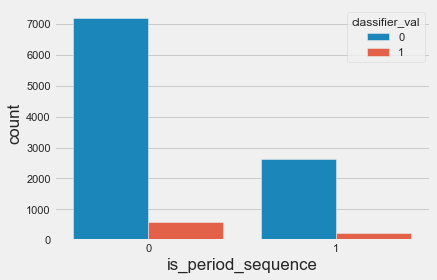

In [196]:
sns.countplot(x="is_period_sequence", data=df11,hue='classifier_val')

In [61]:
# we can see when a comment has a sequance of dots ..it has a high probabality for being a ham comment

#### 'black_word_count' vs 'classifier_val'

In [197]:
pd.pivot_table(data=df11, index=['classifier_val'],values=['black_word_count'],aggfunc='mean')

,black_word_count
classifier_val,
0,0.910589
1,3.139303


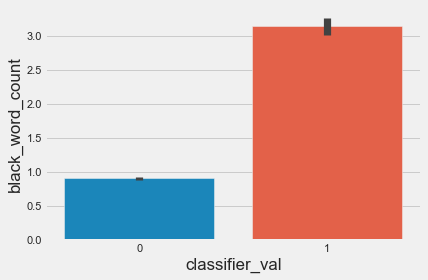

In [198]:
sns.barplot(data=df11, x='classifier_val',y='black_word_count')
plt.show()

<AxesSubplot:xlabel='black_word_count', ylabel='classifier_val'>

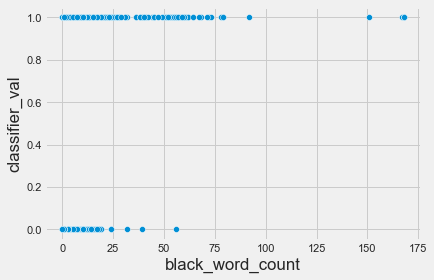

In [199]:
sns.scatterplot(data=df,x='black_word_count',y='classifier_val')

In [65]:
# we can see spam comments have a high number of black words counts

#### 'is_link' vs 'classifier_val'

In [200]:
pd.pivot_table(data=df11, index=['classifier_val','is_link'],values=['com'],aggfunc='count')

com
classifier_val is_link      
0              0        9786
               1          45
1              0         427
               1         377

<AxesSubplot:xlabel='is_link', ylabel='count'>

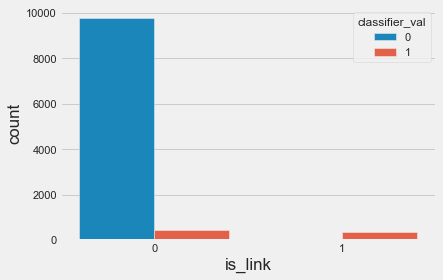

In [201]:
sns.countplot(x="is_link", data=df11,hue='classifier_val')

In [68]:
# if a comment has a link then it has a high probability for being a spam comment

#### 'is_youtube_link' vs 'classifier_val'

In [202]:
pd.pivot_table(data=df11, index=['classifier_val','is_youtube_link'],values=['com'],aggfunc='count')

com
classifier_val is_youtube_link      
0              0                9796
               1                  35
1              0                 599
               1                 205

<AxesSubplot:xlabel='is_youtube_link', ylabel='count'>

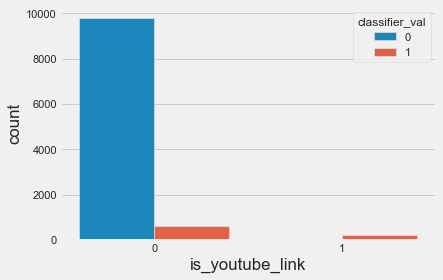

In [203]:
sns.countplot(x="is_youtube_link", data=df11,hue='classifier_val')

In [71]:
# if a comment has a youtube link it has a high probability for being a spam comments

In [204]:
pd.pivot_table(data=df11, index=['is_link','is_youtube_link'], values=['com',],columns=['classifier_val'],aggfunc='count',margins=True)

com            
classifier_val              0    1    All
is_link is_youtube_link                  
0       0                9786  427  10213
1       0                  10  172    182
        1                  35  205    240
All                      9831  804  10635

#### 'is_number' vs 'classifier_val'

In [205]:
pd.pivot_table(data=df11, index=['classifier_val','is_number'],values=['com'],aggfunc='count')

com
classifier_val is_number      
0              0          9822
               1             9
1              0           729
               1            75

<AxesSubplot:xlabel='is_number', ylabel='count'>

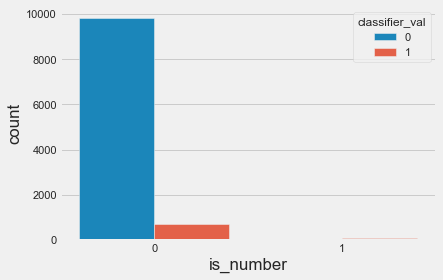

In [206]:
sns.countplot(x="is_number", data=df11,hue='classifier_val')

In [75]:
# we can see when a comment has a phone number information then it has a high probability for being a spam

In [207]:
#pd.pivot_table(data=df11, index=['classifier_val','is_mail'],values=['com'],aggfunc='count')

In [208]:
#sns.countplot(x="is_mail", data=df11,hue='classifier_val')

In [78]:
# no mails in dataset 

In [209]:
#df11.corr()

### find the realtionship between continouse features and target variable

In [210]:
continous_features

['sim_content',
 'sin_comment',
 'duplicate_word_ratio',
 'stop_word_ratio',
 'post_coment_gap',
 'comment_duplication']

In [211]:
pd.pivot_table(df11, index = 'classifier_val', values = continous_features , aggfunc='mean' ,margins=True)

,comment_duplication,duplicate_word_ratio,post_coment_gap,sim_content,sin_comment,stop_word_ratio
classifier_val,,,,,,
0,0.010616,0.027033,2719.836108,0.240825,0.289982,0.041071
1,0.195443,0.056738,4435.056750,0.265370,0.305641,0.032007
All,0.024589,0.029279,2849.505821,0.242680,0.291166,0.040386


In [82]:
## sim_content

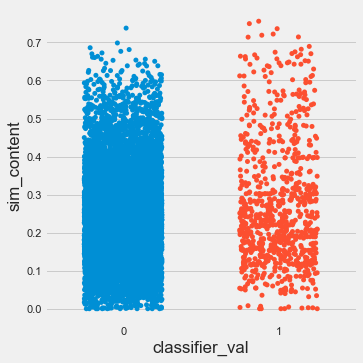

In [212]:
#sns.scatterplot(data=df, y='sim_content',x='classifier_val')
sns.catplot(data=df, y='sim_content',x='classifier_val',jitter=0.25)
#plt.xticks(rotation=80)

In [84]:
# we can see lot of spam comments have in range 0.1 - 0.34
# Ham comments have 0.04 - 0.5 
# therefor usually ham comments have a better cos similerity with it's content

In [85]:
# sin_comment

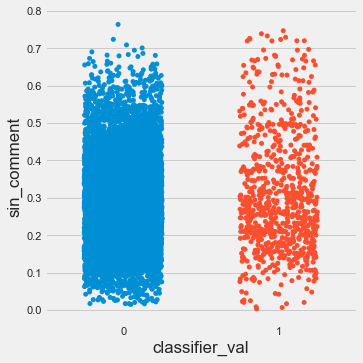

In [213]:
sns.catplot(data=df, y='sin_comment',x='classifier_val',jitter=0.25)

In [87]:
# we can see lot of spam comments have in range 0.15 - 0.32
# Ham comments have 0.04 - 0.55 
# therefor usually ham comments have a better cos similerity with it's sourounding comments

In [88]:
# stop_word_ratio

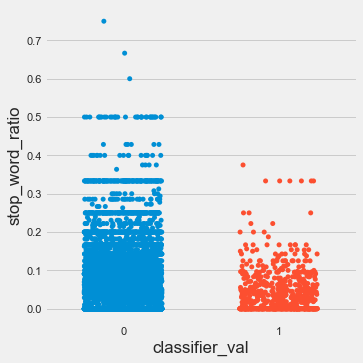

In [214]:
sns.catplot(data=df, y='stop_word_ratio',x='classifier_val',jitter=0.25)

In [90]:
# spam comments have a low number of stop words ratio

In [91]:
# post_coment_gap

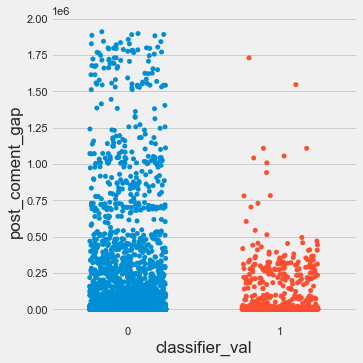

In [215]:
sns.catplot(data=df, y='post_coment_gap',x='classifier_val',jitter=0.25)

In [93]:
# we can see lot of spam comments have in range 0.001 - 0.01
# Ham comments have 0.001 - 0. 2
# we can conclude spam comments have a high probability of having a less time gap of (post - comment)

In [94]:
# duplicate_word_ratio

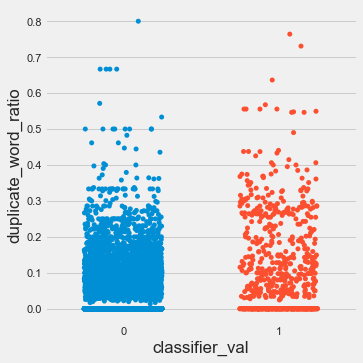

In [216]:
sns.catplot(data=df, y='duplicate_word_ratio',x='classifier_val',jitter=0.25)

In [96]:
# ham comments -> 0 - 0.2
# spam comments -> it has a several areas 0 to 0.01 , 0.05 to 0.15 , 0.28 to 0.3

In [217]:
# Feature correaltion

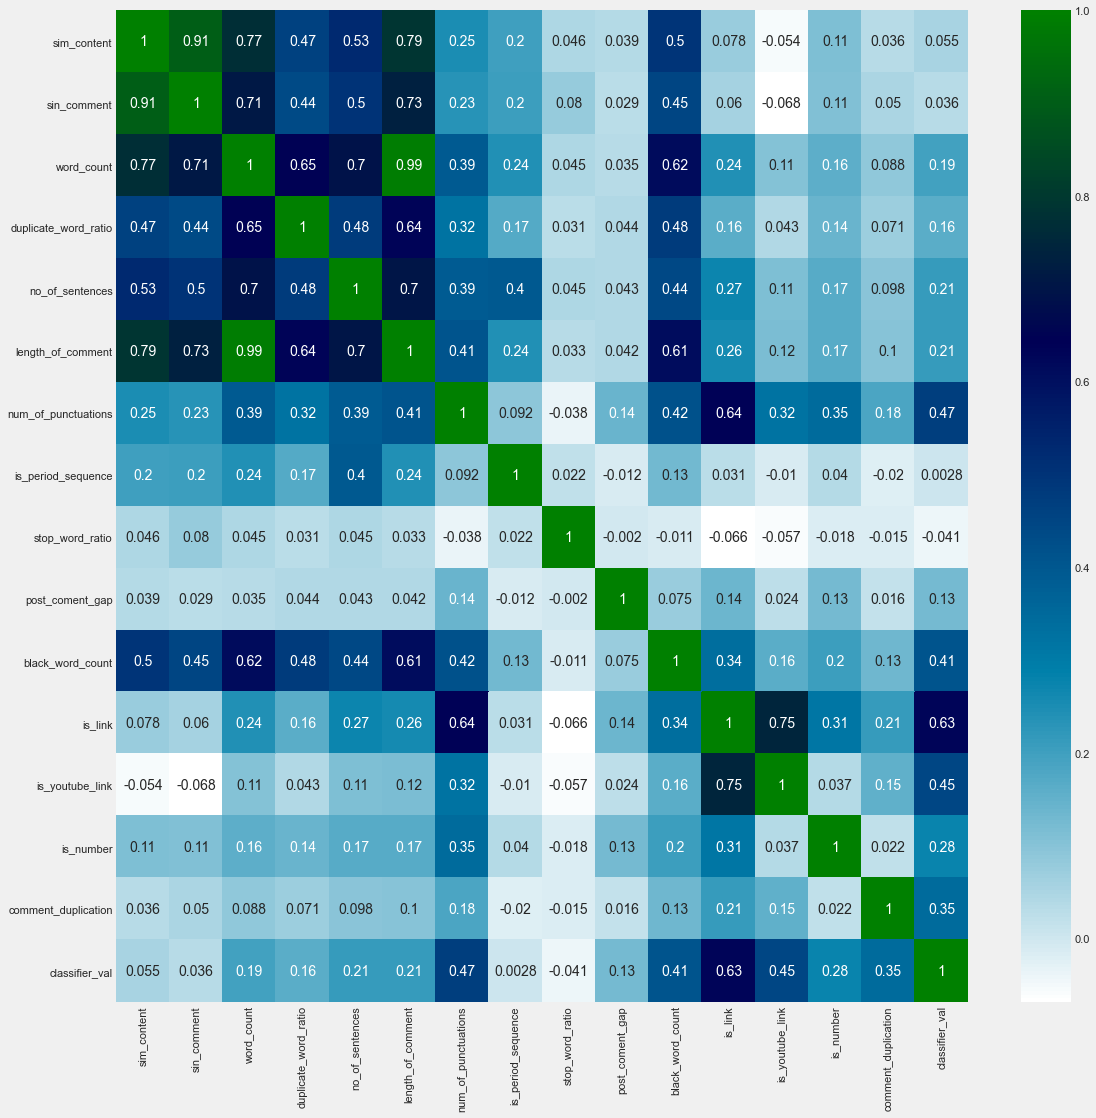

In [218]:
plt.figure(figsize=(17,17))
sns.heatmap(df11.corr(),annot=True,cmap='ocean_r')
plt.show()

### Data distribution

In [219]:
d_columns = [x for x in df11.columns if x!= 'com']

<Figure size 2880x2880 with 0 Axes>

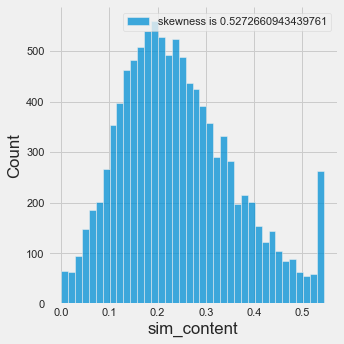

<Figure size 2880x2880 with 0 Axes>

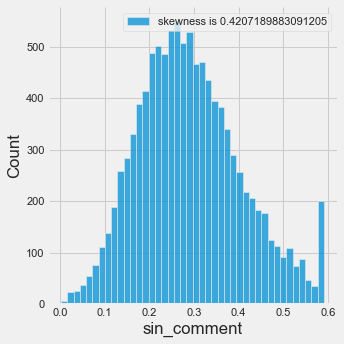

<Figure size 2880x2880 with 0 Axes>

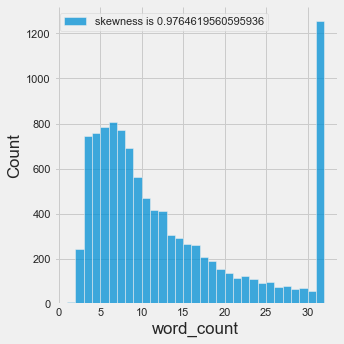

<Figure size 2880x2880 with 0 Axes>

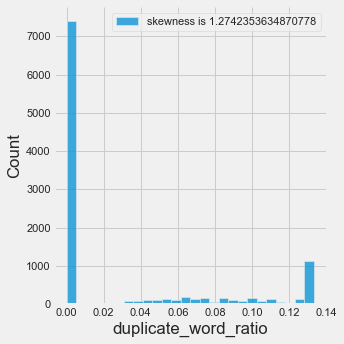

<Figure size 2880x2880 with 0 Axes>

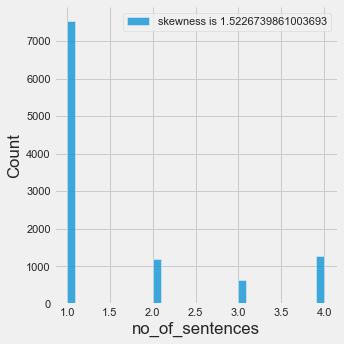

<Figure size 2880x2880 with 0 Axes>

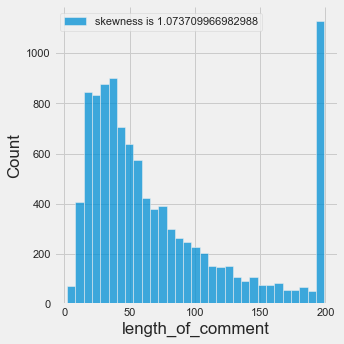

<Figure size 2880x2880 with 0 Axes>

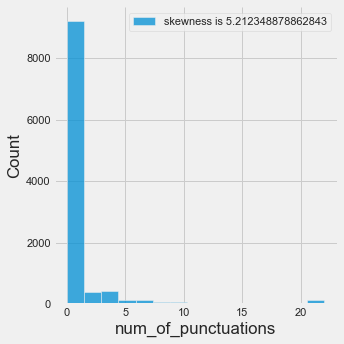

<Figure size 2880x2880 with 0 Axes>

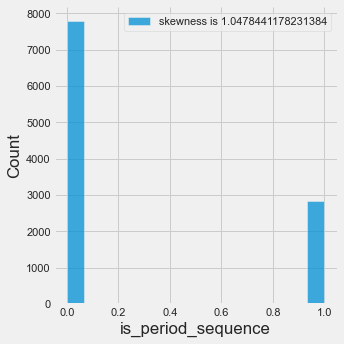

<Figure size 2880x2880 with 0 Axes>

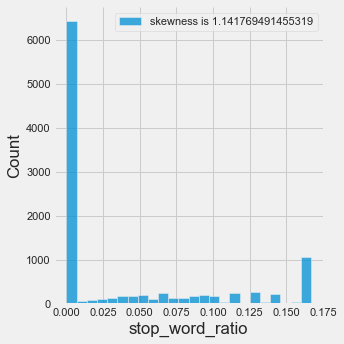

<Figure size 2880x2880 with 0 Axes>

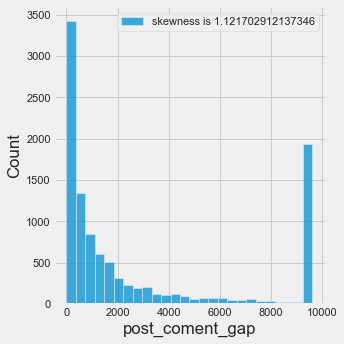

<Figure size 2880x2880 with 0 Axes>

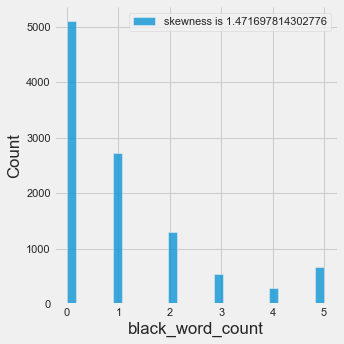

<Figure size 2880x2880 with 0 Axes>

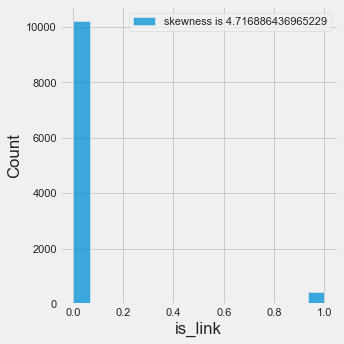

<Figure size 2880x2880 with 0 Axes>

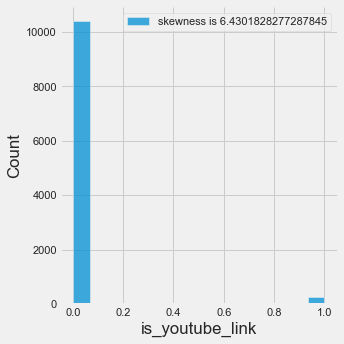

<Figure size 2880x2880 with 0 Axes>

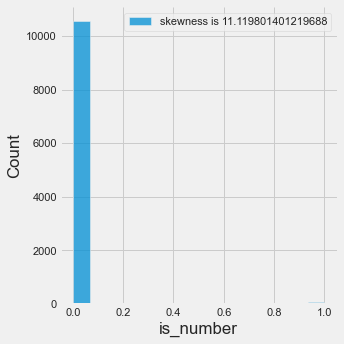

<Figure size 2880x2880 with 0 Axes>

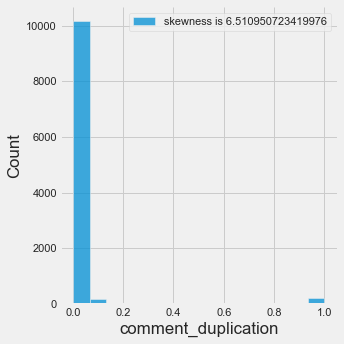

<Figure size 2880x2880 with 0 Axes>

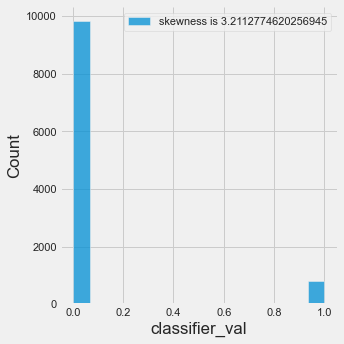

In [220]:
for x in d_columns:
    plt.figure(figsize=(40,40))
    sns.displot(df11[x],label="skewness is {}".format(df11[x].skew()),stat="count")
    plt.legend(loc='best')
    plt.show()

### Data transformation

Here we gonna use few trnformation techniques to find the best one for each features

1) Logarithmic transformation <br>
2) Reciprocal transformation <br>
3) Square root transformation <br>
4) Exponential transformation (more general, you can use any exponent) <br>
5) Boxcox transformation <br>

 

In [221]:
def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    print("skewness is {}".format(df[feature].skew()))
    df[feature].hist()
    plt.title(feature)
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.title(feature)
    plt.show()

In [248]:
# 'sim_content'
df12 = df11.copy()

skewness is 0.0760860110369735


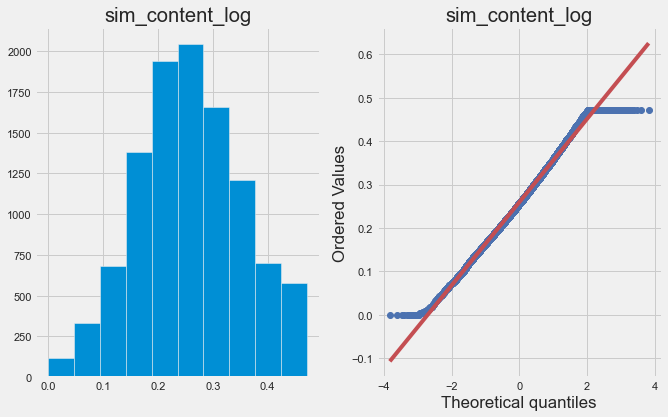

skewness is -0.43368280435737205


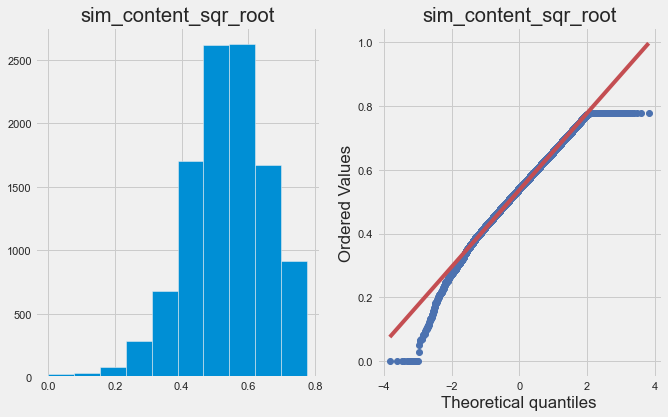

skewness is 1.2210770992502715


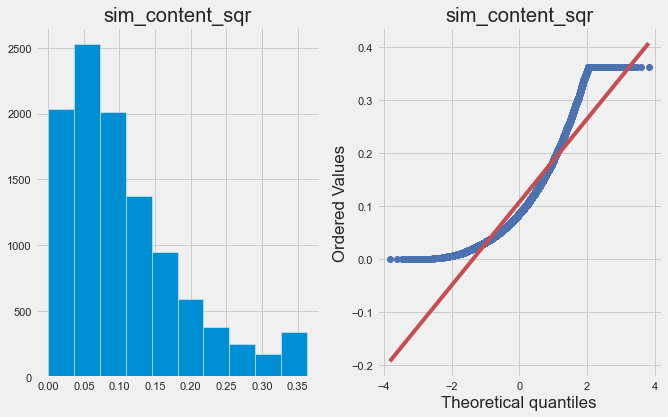

skewness is 0.11348661218272715


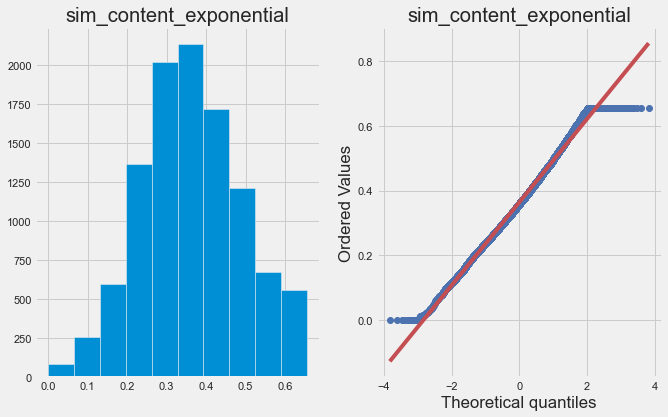

In [249]:
for i in ['sim_content']:
    df12[i+'_log']=np.log(df12[i]+1)
    plot_data(df12,i+'_log')
    
    df12[i+'_reciprocal']=1/df12[i]
    #plot_data(df12,i+'_reciprocal')
    
    df12[i+'_sqr_root']=df12[i]**(1/2)
    plot_data(df12,i+'_sqr_root')
    
    df12[i+'_sqr']=df12[i]**2
    plot_data(df12,i+'_sqr')
    
    df12[i+'_exponential']=df12[i]**(1/1.2)
    plot_data(df12,i+'_exponential')
    
    #df12[i+'_Boxcox'],parameters=stat.boxcox(df12[i])
    #plot_data(df12,i+'_Boxcox')

In [ ]:
# exponential transformation is better for sim_content
# we gonna add it to df11

skewness is 0.3147154407535213


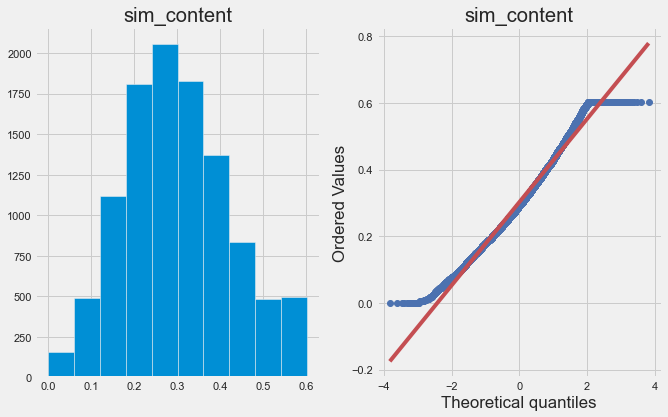

In [230]:
df11['sim_content']=df11['sim_content']**(1/1.2)
plot_data(df11,'sim_content')

In [231]:
# 'sin_comment'
df12 =df11.copy()

skewness is -1.2331106115392614


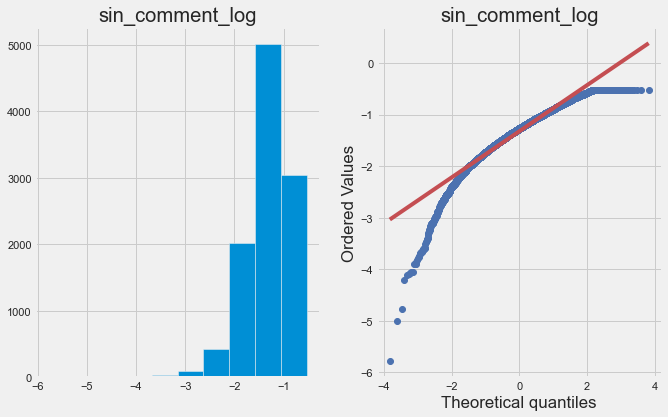

skewness is 33.55134553701388


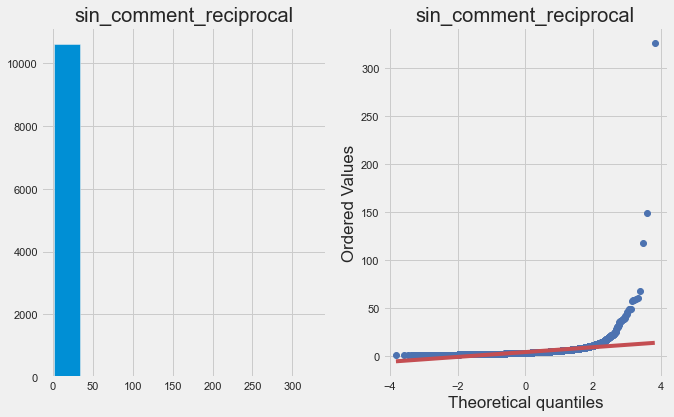

skewness is -0.18748784134758775


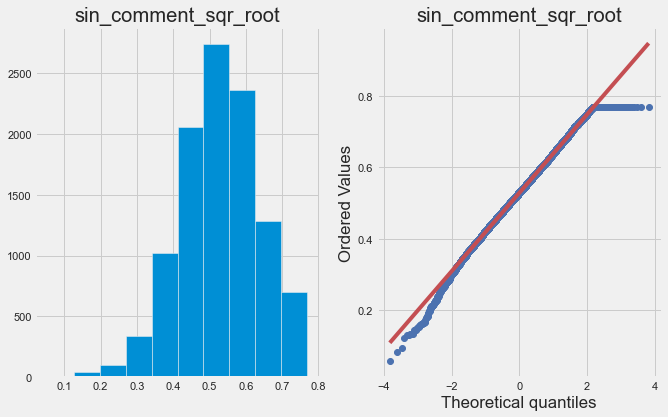

skewness is 1.3227710913624857


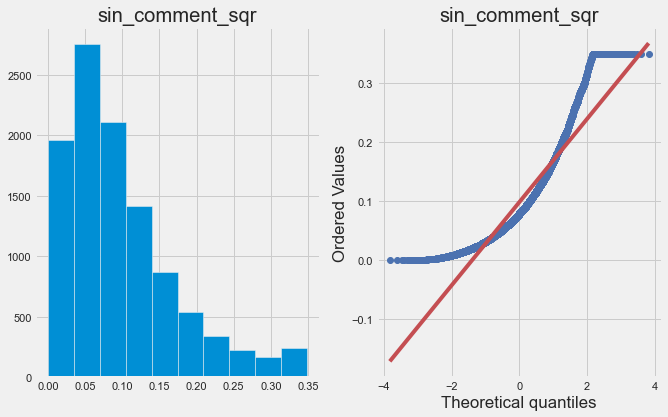

skewness is 0.23885749449943042


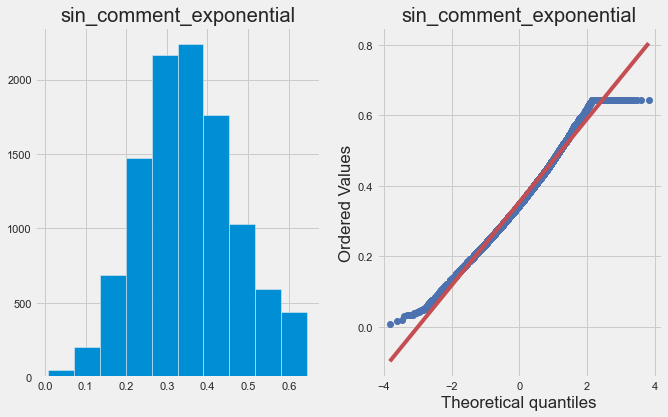

skewness is -0.004604085885120692


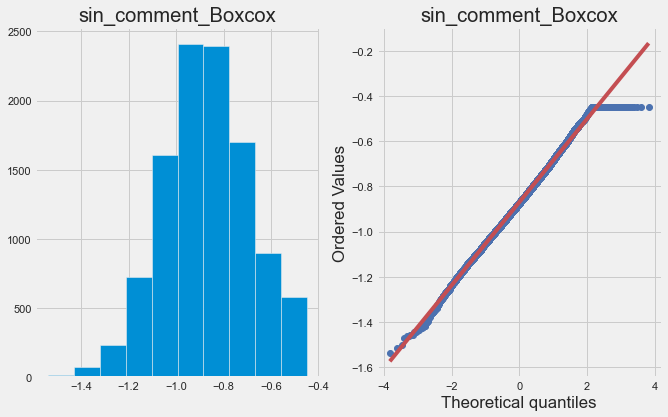

In [232]:
for i in ['sin_comment']:
    df12[i+'_log']=np.log(df12[i])
    plot_data(df12,i+'_log')
    
    df12[i+'_reciprocal']=1/df12[i]
    plot_data(df12,i+'_reciprocal')
    
    df12[i+'_sqr_root']=df12[i]**(1/2)
    plot_data(df12,i+'_sqr_root')
    
    df12[i+'_sqr']=df12[i]**2
    plot_data(df12,i+'_sqr')
    
    df12[i+'_exponential']=df12[i]**(1/1.2)
    plot_data(df12,i+'_exponential')
    
    df12[i+'_Boxcox'],parameters=stat.boxcox(df12[i])
    plot_data(df12,i+'_Boxcox')

In [ ]:
# boxcox transformation is better for sin_comment
# we gonna add it to df11

skewness is -0.004604085885120692


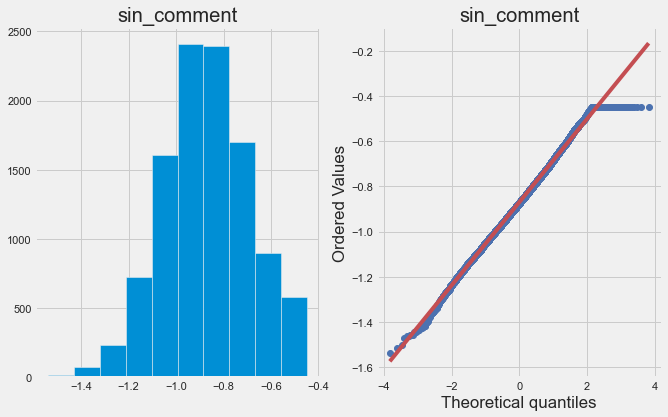

In [233]:
df11['sin_comment'],parameters=stat.boxcox(df11['sin_comment'])
plot_data(df11,'sin_comment')

In [234]:
# 'word_count'
df12 = df11.copy()

skewness is -0.024390933263173188


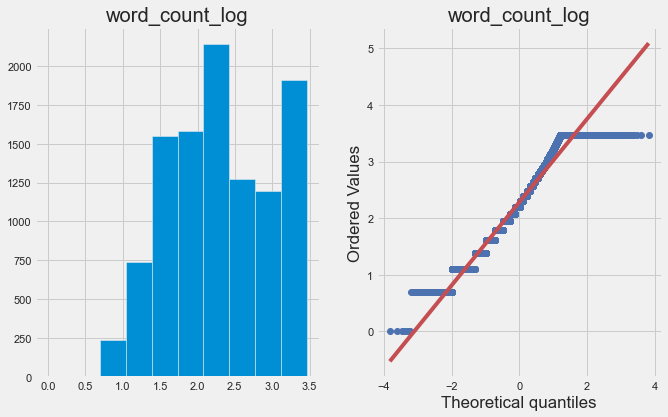

skewness is 1.7489586585064372


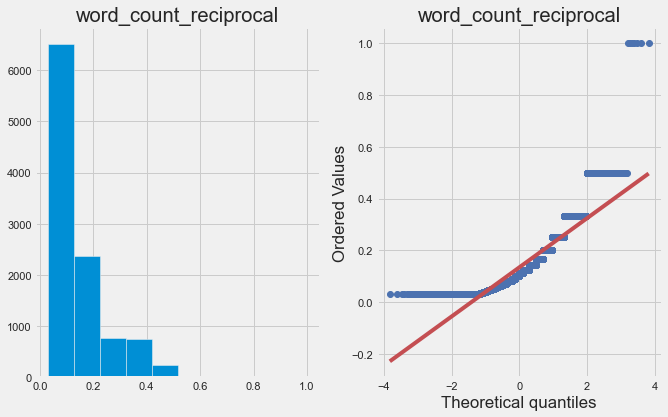

skewness is 0.5466331080488938


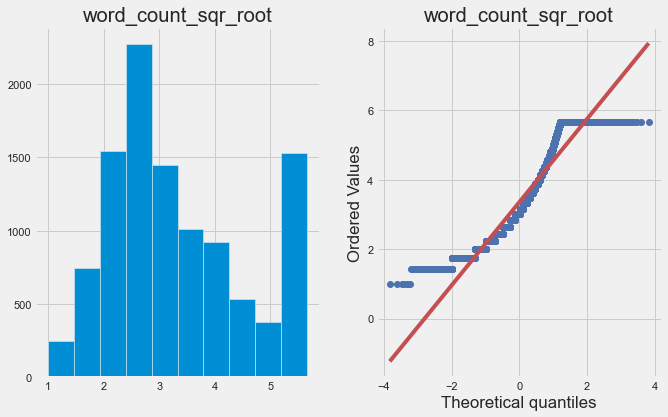

skewness is 1.5139279204250697


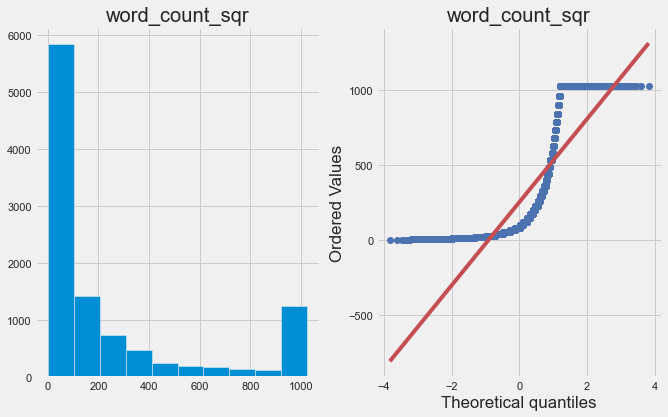

skewness is 0.8475954508894201


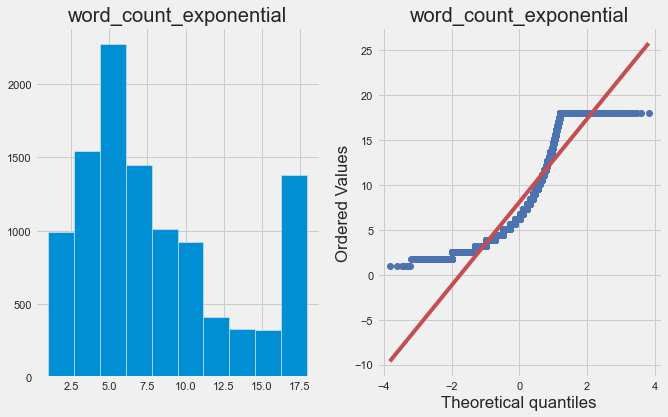

skewness is -0.0034655321692413647


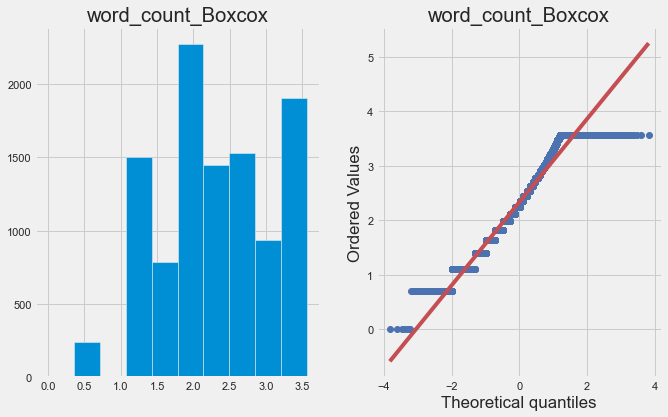

In [235]:
for i in ['word_count']:
    df12[i+'_log']=np.log(df12[i])
    plot_data(df12,i+'_log')
    
    df12[i+'_reciprocal']=1/df12[i]
    plot_data(df12,i+'_reciprocal')
    
    df12[i+'_sqr_root']=df12[i]**(1/2)
    plot_data(df12,i+'_sqr_root')
    
    df12[i+'_sqr']=df12[i]**2
    plot_data(df12,i+'_sqr')
    
    df12[i+'_exponential']=df12[i]**(1/1.2)
    plot_data(df12,i+'_exponential')
    
    df12[i+'_Boxcox'],parameters=stat.boxcox(df12[i])
    plot_data(df12,i+'_Boxcox')

In [ ]:
# Boxcox transformation is better for word_count
# we gonna add it to df11

skewness is -0.0034655321692413647


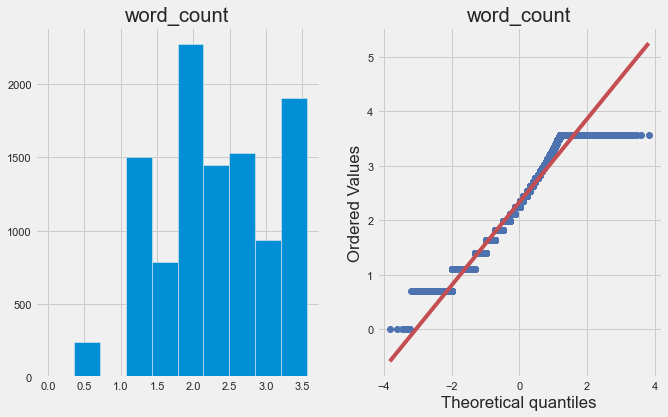

In [236]:
df11['word_count'],parameters=stat.boxcox(df11['word_count'])
plot_data(df11,'word_count')

In [237]:
# 'length_of_comment'
df12 = df11.copy()

skewness is -0.07711493239503658


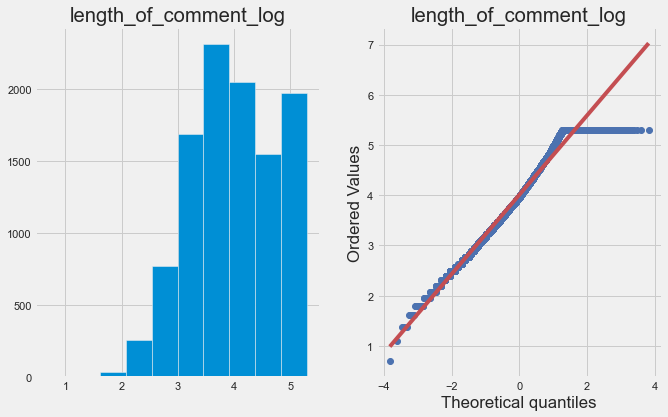

skewness is 3.3882689103988377


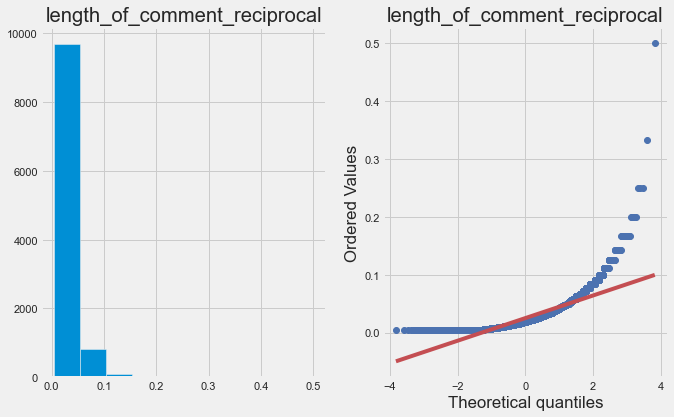

skewness is 0.5960631023823337


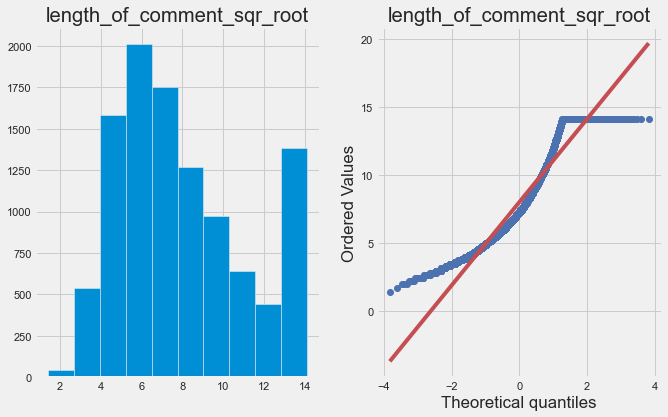

skewness is 1.6507731410266904


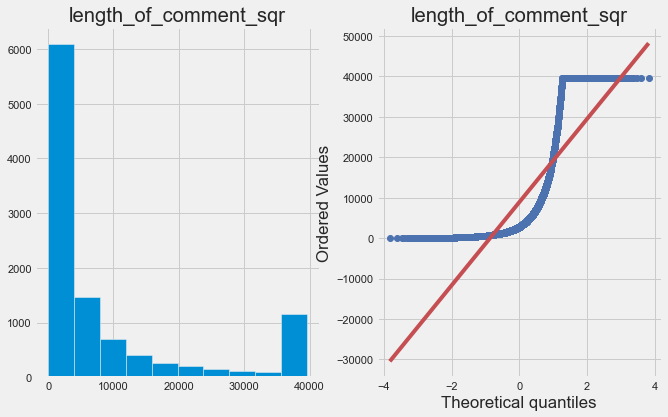

skewness is 0.9322603995567466


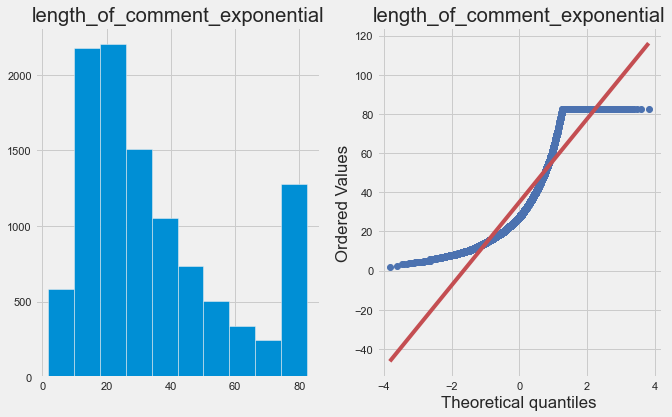

skewness is -0.008179326546121975


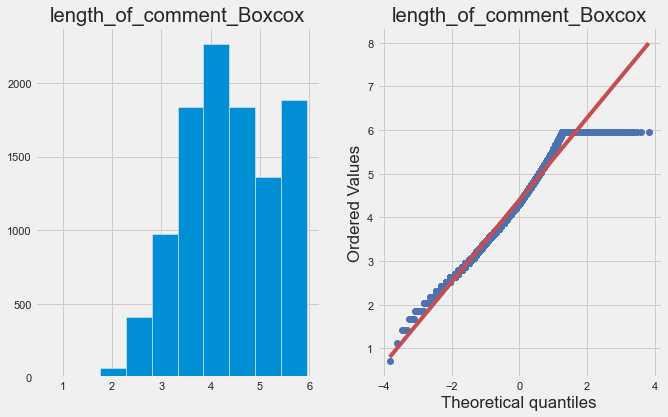

In [238]:
for i in ['length_of_comment']:
    df12[i+'_log']=np.log(df12[i])
    plot_data(df12,i+'_log')
    
    df12[i+'_reciprocal']=1/df12[i]
    plot_data(df12,i+'_reciprocal')
    
    df12[i+'_sqr_root']=df12[i]**(1/2)
    plot_data(df12,i+'_sqr_root')
    
    df12[i+'_sqr']=df12[i]**2
    plot_data(df12,i+'_sqr')
    
    df12[i+'_exponential']=df12[i]**(1/1.2)
    plot_data(df12,i+'_exponential')
    
    df12[i+'_Boxcox'],parameters=stat.boxcox(df12[i])
    plot_data(df12,i+'_Boxcox')

In [ ]:
# Boxcox transformation is better for length_of_comment
# we gonna add it to df11

skewness is -0.008179326546121975


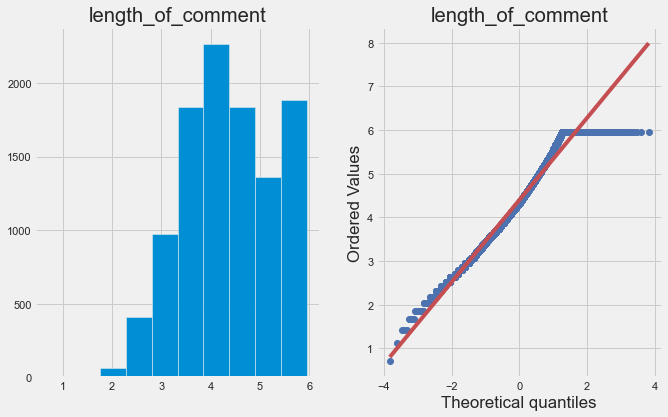

In [239]:
df11['length_of_comment'],parameters=stat.boxcox(df11['length_of_comment'])
plot_data(df11,'length_of_comment')

In [240]:
# 'post_coment_gap'
df12 = df11.copy()

skewness is -0.5760646884625559


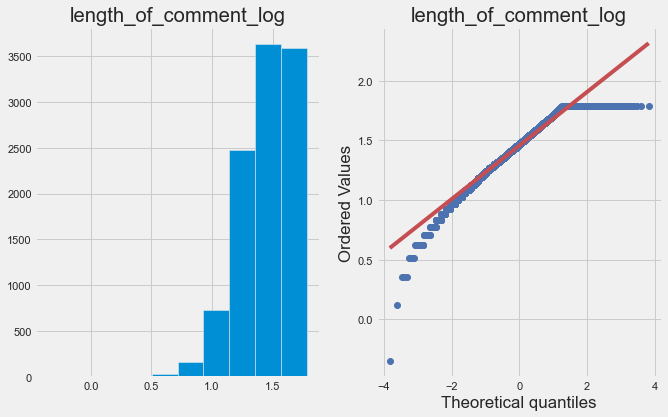

skewness is 2.0527839943705577


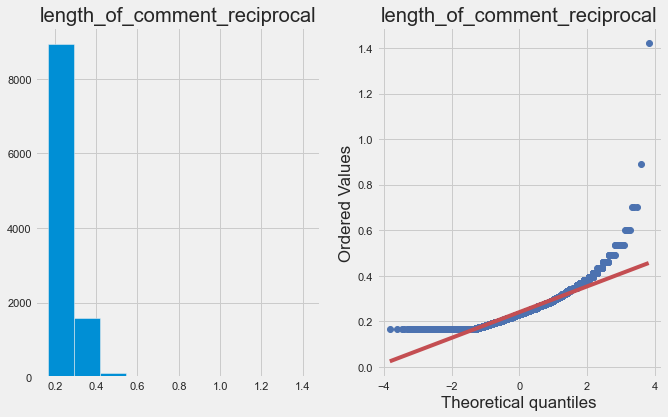

skewness is -0.25705644067032096


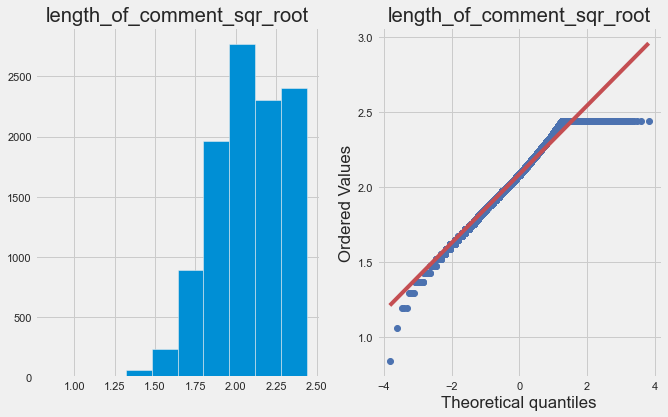

skewness is 0.38088154707567917


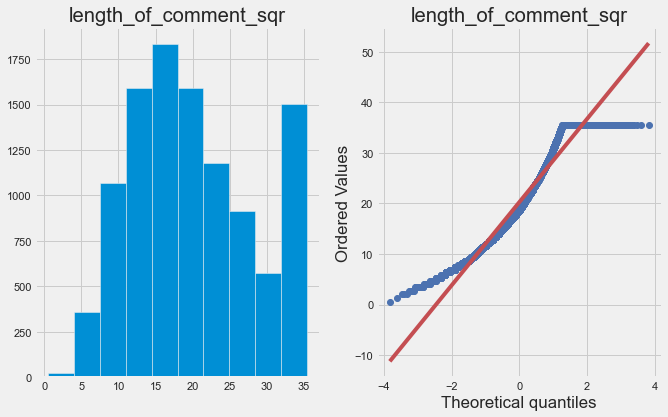

skewness is -0.08573109888285342


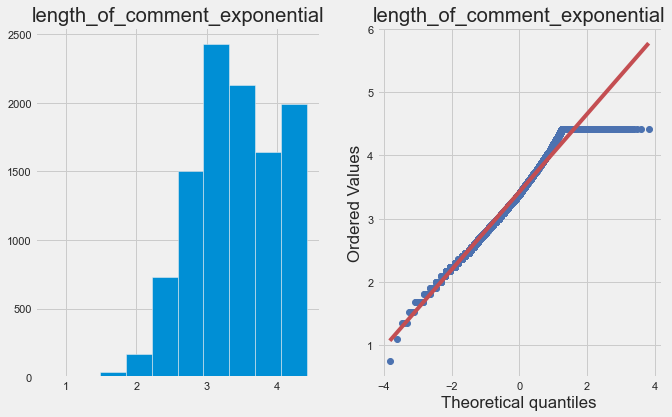

skewness is -0.042989537982866456


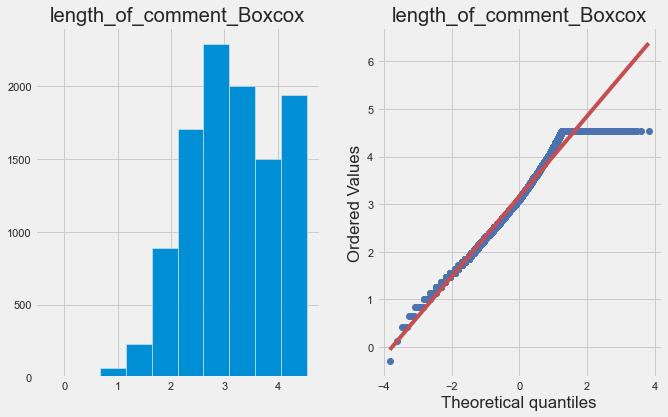

In [241]:
for i in ['length_of_comment']:
    df12[i+'_log']=np.log(df12[i])
    plot_data(df12,i+'_log')
    
    df12[i+'_reciprocal']=1/df12[i]
    plot_data(df12,i+'_reciprocal')
    
    df12[i+'_sqr_root']=df12[i]**(1/2)
    plot_data(df12,i+'_sqr_root')
    
    df12[i+'_sqr']=df12[i]**2
    plot_data(df12,i+'_sqr')
    
    df12[i+'_exponential']=df12[i]**(1/1.2)
    plot_data(df12,i+'_exponential')
    
    df12[i+'_Boxcox'],parameters=stat.boxcox(df12[i])
    plot_data(df12,i+'_Boxcox')

In [ ]:
# Boxcox transformation is better for post_coment_gap
# we gonna add it to df11

skewness is -0.08113643974715089


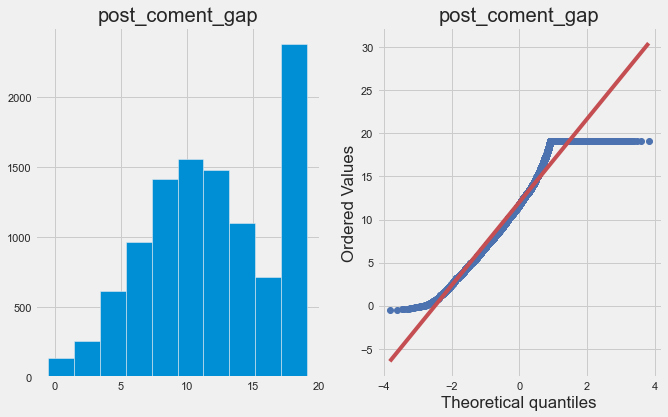

In [242]:
df11['post_coment_gap'],parameters=stat.boxcox(df11['post_coment_gap'])
plot_data(df11,'post_coment_gap')

In [ ]:
# features distribution data tranformed to a normal distribution ( not completely but closely)

In [243]:
df11.head()

,com,sim_content,sin_comment,word_count,duplicate_word_ratio,no_of_sentences,length_of_comment,num_of_punctuations,is_period_sequence,stop_word_ratio,post_coment_gap,black_word_count,is_link,is_youtube_link,is_number,comment_duplication,classifier_val
0,Ugx18OdhnjkAtm4_kvF4AaABAg,0.265999,-0.885466,1.402002,0.000000,1,3.142169,0.0,0,0.0,19.075011,1.0,0,0,0,0.0,0
1,Ugy3Fx_GQfOtmO9C2kF4AaABAg,0.327123,-0.922096,2.768422,0.000000,1,4.917200,0.0,0,0.0,19.075011,0.0,0,0,0,0.0,0
2,UgxCTzZDv-L9XYzGWEB4AaABAg,0.433972,-0.746774,3.531449,0.032258,1,5.735184,0.0,0,0.0,19.075011,4.0,0,0,0,0.0,0
3,UgxASPCwYx4JjumZvc94AaABAg,0.201993,-1.008426,1.818057,0.000000,1,3.777639,0.0,0,0.0,19.075011,0.0,0,0,0,0.0,1
4,UgxYCLuvtZ2IGy0zFfl4AaABAg,0.176263,-1.131799,1.402002,0.000000,1,3.015984,0.0,0,0.0,19.075011,0.0,0,0,0,0.0,0


In [244]:
df11.columns

Index(['com', 'sim_content', 'sin_comment', 'word_count',
       'duplicate_word_ratio', 'no_of_sentences', 'length_of_comment',
       'num_of_punctuations', 'is_period_sequence', 'stop_word_ratio',
       'post_coment_gap', 'black_word_count', 'is_link', 'is_youtube_link',
       'is_number', 'comment_duplication', 'classifier_val'],
      dtype='object')

In [245]:
df12 = df11.drop('com',axis=1)

In [246]:
df12.columns

Index(['sim_content', 'sin_comment', 'word_count', 'duplicate_word_ratio',
       'no_of_sentences', 'length_of_comment', 'num_of_punctuations',
       'is_period_sequence', 'stop_word_ratio', 'post_coment_gap',
       'black_word_count', 'is_link', 'is_youtube_link', 'is_number',
       'comment_duplication', 'classifier_val'],
      dtype='object')

In [247]:
df12.to_csv('model.csv')